In [3]:
import pandas as pd
import numpy as np

# Cargar la base de datos
base = pd.read_csv("SimulacionQATAR2022.csv")

# Definir función para simular enfrentamientos
def simular_enfrentamiento(equipo1, equipo2):
    puntaje1 = base.loc[base['PAIS'] == equipo1, 'PUNTAJE'].values[0]
    puntaje2 = base.loc[base['PAIS'] == equipo2, 'PUNTAJE'].values[0]
    equipo_mayor, equipo_menor = (equipo1, equipo2) if puntaje1 > puntaje2 else (equipo2, equipo1)
    puntaje_mayor = max(puntaje1, puntaje2)
    puntaje_menor = min(puntaje1, puntaje2)
    p = 0.5 + (puntaje_mayor / puntaje_menor - 1)
    ganador = equipo_mayor if np.random.binomial(1, p) == 1 else equipo_menor
    return ganador

# Crear dataframe para resultados
resultados = pd.DataFrame(columns=["ganador", "finalista1", "finalista2", "semi1", "semi2", "semi3", "semi4"])

# Crear dataframe para almacenar resultados de cada ronda
resultados = pd.DataFrame(columns=[
    "ganador", "finalista1", "finalista2",
    "semi1", "semi2", "semi3", "semi4",
    "cuarto1", "cuarto2", "cuarto3", "cuarto4",
    "octavo1", "octavo2", "octavo3", "octavo4",
    "octavo5", "octavo6", "octavo7", "octavo8"
])

# Simulación
np.random.seed(0)
for i in range(1000):
    # Inicialización de los grupos y puntuaciones
    for grupo_nombre in ["A", "B", "C", "D", "E", "F", "G", "H"]:
        grupo = base[base['GRUPO'] == grupo_nombre].copy()
        grupo['PUNTOS'] = 0

        # Enfrentamientos dentro del grupo
        for i, j in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
            ganador = simular_enfrentamiento(grupo.iloc[i]['PAIS'], grupo.iloc[j]['PAIS'])
            grupo.loc[grupo['PAIS'] == ganador, 'PUNTOS'] += 3
        
        # Ordenar el grupo por puntos y puntaje
        grupo = grupo.sort_values(by=['PUNTOS', 'PUNTAJE'], ascending=[False, False]).reset_index(drop=True)
        # Asignar primer y segundo del grupo
        if grupo_nombre == "A":
            A1, A2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "B":
            B1, B2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "C":
            C1, C2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "D":
            D1, D2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "E":
            E1, E2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "F":
            F1, F2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "G":
            G1, G2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
        elif grupo_nombre == "H":
            H1, H2 = grupo.iloc[0]['PAIS'], grupo.iloc[1]['PAIS']
    
    # Octavos de final
    octavo1 = simular_enfrentamiento(A1, B2)
    octavo2 = simular_enfrentamiento(C1, D2)
    octavo3 = simular_enfrentamiento(E1, F2)
    octavo4 = simular_enfrentamiento(G1, H2)
    octavo5 = simular_enfrentamiento(B1, A2)
    octavo6 = simular_enfrentamiento(D1, C2)
    octavo7 = simular_enfrentamiento(F1, E2)
    octavo8 = simular_enfrentamiento(H1, G2)
    
    # Cuartos de final
    cuarto1 = simular_enfrentamiento(octavo1, octavo2)
    cuarto2 = simular_enfrentamiento(octavo3, octavo4)
    cuarto3 = simular_enfrentamiento(octavo5, octavo6)
    cuarto4 = simular_enfrentamiento(octavo7, octavo8)
    
    # Semifinales
    semi1 = simular_enfrentamiento(cuarto1, cuarto2)
    semi2 = simular_enfrentamiento(cuarto3, cuarto4)
    
    # Final
    final = simular_enfrentamiento(semi1, semi2)
    
    # Guardar resultados utilizando pd.concat en lugar de append
    resultados = pd.concat([resultados, pd.DataFrame([{
        "ganador": final,
        "finalista1": semi1,
        "finalista2": semi2,
        "semi1": cuarto1,
        "semi2": cuarto2,
        "semi3": cuarto3,
        "semi4": cuarto4,
        "cuarto1": octavo1,
        "cuarto2": octavo2,
        "cuarto3": octavo3,
        "cuarto4": octavo4,
        "octavo1": octavo5,
        "octavo2": octavo6,
        "octavo3": octavo7,
        "octavo4": octavo8
    }])], ignore_index=True)

# Contar victorias
victorias = resultados.groupby('ganador').size().reset_index(name='victorias')
victorias['porcentaje_victoria'] = victorias['victorias'] / 1000
victorias = victorias.sort_values(by='porcentaje_victoria', ascending=False)

# Mostrar resultados
print(victorias.head())
print(resultados.head())  # Muestra los primeros resultados con todas las rondas de partidos

      ganador  victorias  porcentaje_victoria
4      BRASIL        130                0.130
3     BELGICA        100                0.100
1   ARGENTINA         85                0.085
14    FRANCIA         77                0.077
13    ESPANIA         66                0.066
        ganador    finalista1  finalista2         semi1     semi2       semi3  \
0  PAISES BAJOS  PAISES BAJOS      BRASIL  PAISES BAJOS   URUGUAY     POLONIA   
1          IRAN          IRAN      MEXICO          IRAN   URUGUAY      MEXICO   
2          IRAN      ALEMANIA        IRAN  PAISES BAJOS  ALEMANIA        IRAN   
3    INGLATERRA     ARGENTINA  INGLATERRA     ARGENTINA   ESPANIA  INGLATERRA   
4       BELGICA        BRASIL     BELGICA         TUNEZ    BRASIL   DINAMARCA   

      semi4       cuarto1    cuarto2   cuarto3  cuarto4     octavo1  \
0    BRASIL  PAISES BAJOS  ARGENTINA   CROACIA  URUGUAY       QATAR   
1   CAMERUN          IRAN    FRANCIA   ESPANIA  URUGUAY     EE. UU.   
2  PORTUGAL  PAISES BAJO

C:\Users\Alvar\AppData\Local\Temp\ipykernel_20788\181576420.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=victorias.head(10),


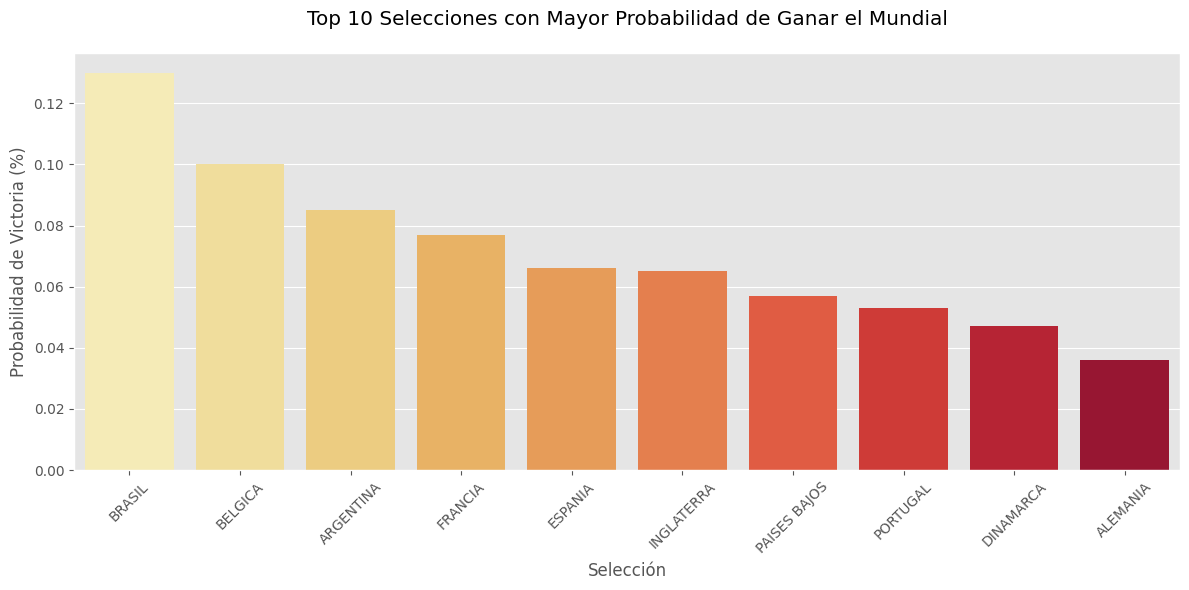

C:\Users\Alvar\AppData\Local\Temp\ipykernel_20788\181576420.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=semifinalistas.head(10),


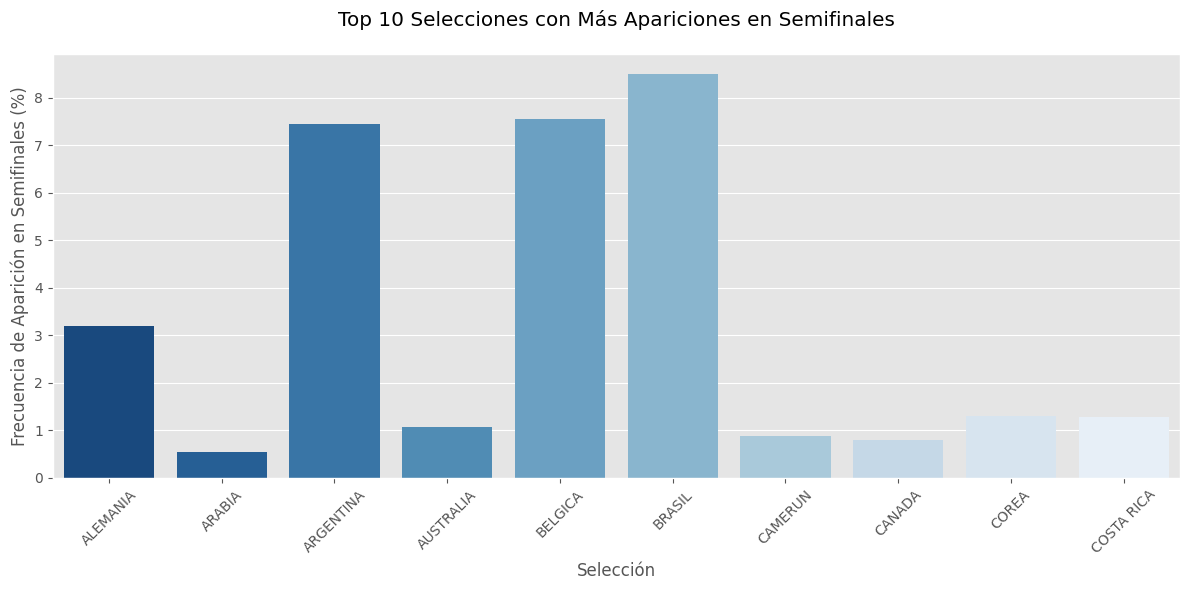

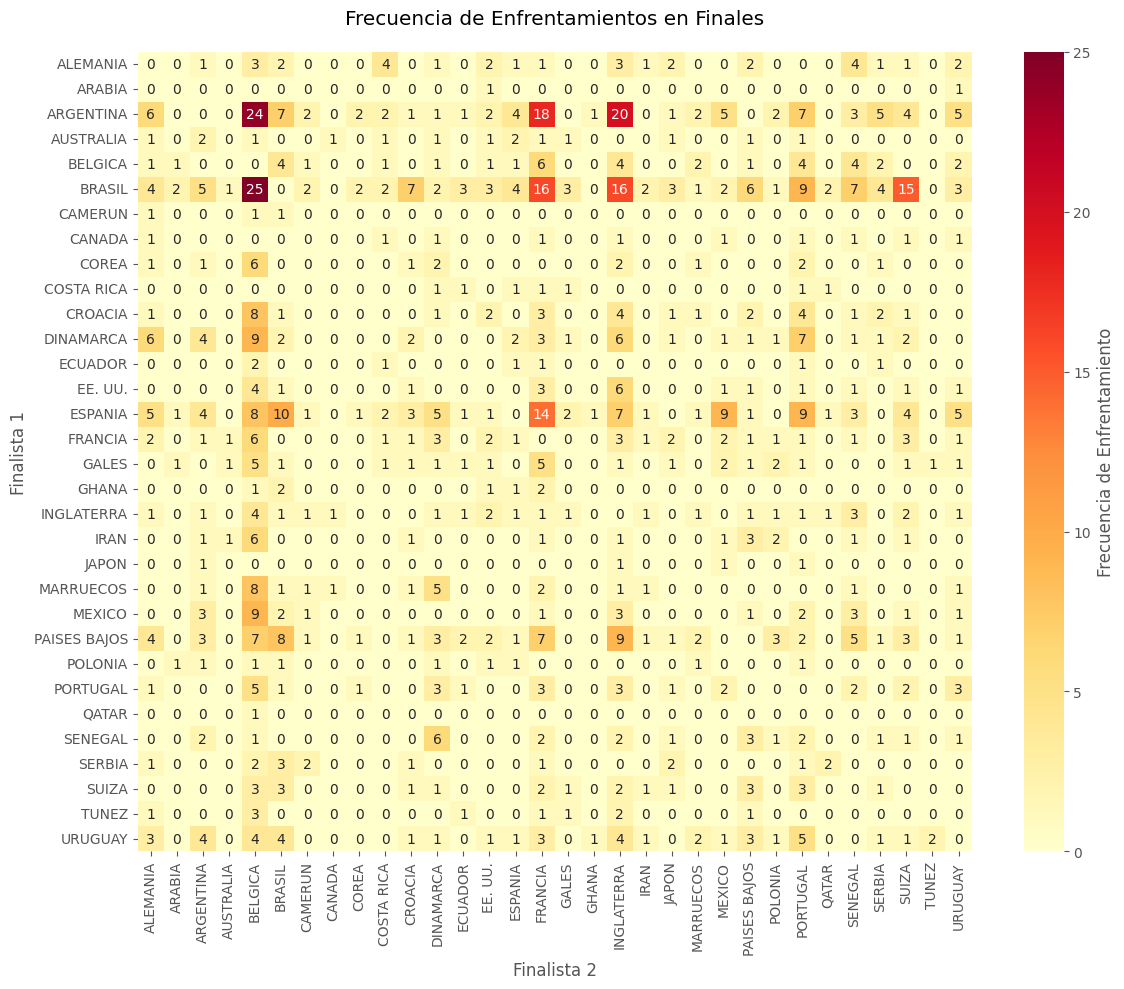

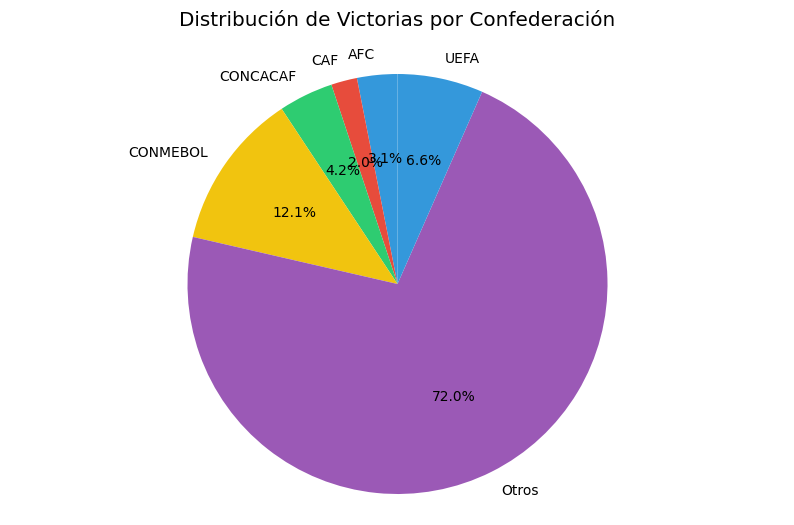

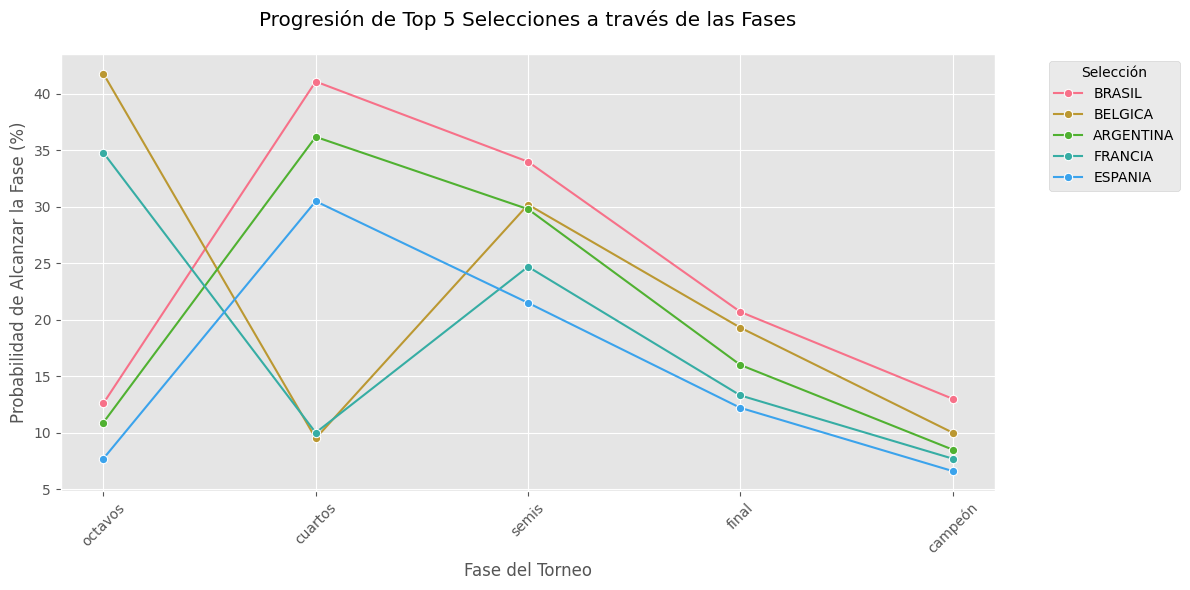

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo visual
plt.style.use('ggplot')
sns.set_palette("husl")

# 1. Gráfico de Probabilidades de Victoria
plt.figure(figsize=(12, 6))
sns.barplot(data=victorias.head(10), 
            x='ganador', 
            y='porcentaje_victoria', 
            palette='YlOrRd')
plt.title('Top 10 Selecciones con Mayor Probabilidad de Ganar el Mundial', pad=20)
plt.xlabel('Selección')
plt.ylabel('Probabilidad de Victoria (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Análisis de Semifinalistas
semifinalistas = pd.concat([
    resultados['semi1'].value_counts(),
    resultados['semi2'].value_counts(),
    resultados['semi3'].value_counts(),
    resultados['semi4'].value_counts()
]).reset_index()
semifinalistas = semifinalistas.groupby('index').sum().reset_index()
semifinalistas.columns = ['seleccion', 'apariciones']
semifinalistas['porcentaje'] = semifinalistas['apariciones'] / 40  # 4 semifinalistas * 1000 torneos

plt.figure(figsize=(12, 6))
sns.barplot(data=semifinalistas.head(10),
            x='seleccion',
            y='porcentaje',
            palette='Blues_r')
plt.title('Top 10 Selecciones con Más Apariciones en Semifinales', pad=20)
plt.xlabel('Selección')
plt.ylabel('Frecuencia de Aparición en Semifinales (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Heatmap de Finalistas
finalistas_matriz = pd.crosstab(resultados['finalista1'], resultados['finalista2'])
plt.figure(figsize=(12, 10))
sns.heatmap(finalistas_matriz,
            cmap='YlOrRd',
            annot=True,
            fmt='d',
            cbar_kws={'label': 'Frecuencia de Enfrentamiento'})
plt.title('Frecuencia de Enfrentamientos en Finales', pad=20)
plt.xlabel('Finalista 2')
plt.ylabel('Finalista 1')
plt.tight_layout()
plt.show()

# 4. Distribución de Victorias por Confederación
# Primero creamos un diccionario de confederaciones
confederaciones = {
    'UEFA': ['SPAIN', 'FRANCE', 'DENMARK', 'SERBIA', 'GERMANY', 'WALES', 'SWITZERLAND', 'POLAND', 
             'NETHERLANDS', 'PORTUGAL', 'CROATIA', 'ENGLAND', 'BELGIUM'],
    'CONMEBOL': ['BRAZIL', 'ARGENTINA', 'URUGUAY', 'ECUADOR'],
    'CONCACAF': ['MEXICO', 'COSTA RICA', 'CANADA', 'UNITED STATES'],
    'AFC': ['IRAN', 'SAUDI ARABIA', 'JAPAN', 'QATAR', 'KOREA REPUBLIC', 'AUSTRALIA'],
    'CAF': ['MOROCCO', 'SENEGAL', 'GHANA', 'TUNISIA', 'CAMEROON']
}

# Función para obtener la confederación
def get_confederacion(pais):
    for conf, paises in confederaciones.items():
        if pais in paises:
            return conf
    return 'Otros'

victorias['confederacion'] = victorias['ganador'].apply(get_confederacion)
victorias_conf = victorias.groupby('confederacion')['victorias'].sum().reset_index()

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6']
plt.pie(victorias_conf['victorias'], 
        labels=victorias_conf['confederacion'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
plt.title('Distribución de Victorias por Confederación', pad=20)
plt.axis('equal')
plt.show()

# 5. Progresión de Equipos por Fases
fases = ['octavos', 'cuartos', 'semis', 'final', 'campeón']
top_5 = victorias.head()['ganador'].tolist()
progresion_data = []

for equipo in top_5:
    octavos_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'octavo' in col])
    cuartos_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'cuarto' in col])
    semis_count = sum([len(resultados[col][resultados[col] == equipo]) for col in resultados.columns if 'semi' in col])
    final_count = len(resultados[resultados['finalista1'] == equipo]) + len(resultados[resultados['finalista2'] == equipo])
    campeon_count = len(resultados[resultados['ganador'] == equipo])
    
    progresion_data.append({
        'equipo': equipo,
        'octavos': octavos_count/1000*100,
        'cuartos': cuartos_count/1000*100,
        'semis': semis_count/1000*100,
        'final': final_count/1000*100,
        'campeón': campeon_count/1000*100
    })

progresion_df = pd.DataFrame(progresion_data)
progresion_df_melted = pd.melt(progresion_df, 
                              id_vars=['equipo'], 
                              value_vars=['octavos', 'cuartos', 'semis', 'final', 'campeón'],
                              var_name='fase',
                              value_name='porcentaje')

plt.figure(figsize=(12, 6))
sns.lineplot(data=progresion_df_melted,
             x='fase',
             y='porcentaje',
             hue='equipo',
             marker='o')
plt.title('Progresión de Top 5 Selecciones a través de las Fases', pad=20)
plt.xlabel('Fase del Torneo')
plt.ylabel('Probabilidad de Alcanzar la Fase (%)')
plt.xticks(rotation=45)
plt.legend(title='Selección', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()